<a href="https://colab.research.google.com/github/CaoHaiNam/CNN_MNIST/blob/master/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import collections
import numpy as np
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


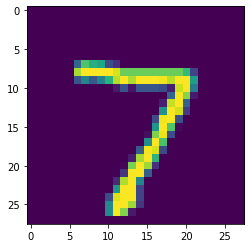

In [4]:
from matplotlib import pyplot as plt
plt.imshow(x_test[0], interpolation='nearest')
plt.show()

In [5]:
print(y_test[0])

7


In [0]:
x_train, x_test = x_train / 255.0, x_test / 255.0
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [0]:
model = tf.keras.models.Sequential([
     # 28x28x1
     Convolution2D(filters=6, kernel_size=(5,5), activation = 'relu', input_shape=input_shape),
     # 24x24x6
     MaxPooling2D(pool_size=(2, 2)),
     # 12x12x6
     Convolution2D(filters=16, kernel_size=(5,5), activation = 'relu'),
     # 8x8x16
     MaxPooling2D(pool_size=(2, 2)),
     # 4x4x16
     Flatten(),
     Dense(128, activation = 'relu'),
     Dense(84, activation = 'relu'),
     Dense(10, activation=tf.nn.softmax)])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=32, validation_split=0.2, epochs=30, verbose=1)

Epoch 1/30
1500/1500 [==============================] - 26s 17ms/step - loss: 0.2037 - accuracy: 0.9395 - val_loss: 0.0963 - val_accuracy: 0.9712
Epoch 2/30
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0648 - accuracy: 0.9802 - val_loss: 0.0668 - val_accuracy: 0.9806
Epoch 3/30
1500/1500 [==============================] - 25s 16ms/step - loss: 0.0461 - accuracy: 0.9861 - val_loss: 0.0483 - val_accuracy: 0.9858
Epoch 4/30
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0372 - accuracy: 0.9884 - val_loss: 0.0484 - val_accuracy: 0.9856
Epoch 5/30
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0306 - accuracy: 0.9902 - val_loss: 0.0465 - val_accuracy: 0.9863
Epoch 6/30
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0255 - accuracy: 0.9916 - val_loss: 0.0446 - val_accuracy: 0.9872
Epoch 7/30
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0220 - accuracy: 0.9930 - val_loss: 0.0550 -

In [0]:
print(model.metrics_names)
print(model.evaluate(x_train, y_train, verbose=2))
print(model.evaluate(x_test, y_test, verbose=2))

['loss', 'accuracy']
1875/1875 - 13s - loss: 0.0255 - accuracy: 0.9974
[0.025498028844594955, 0.9973999857902527]
313/313 - 2s - loss: 0.1107 - accuracy: 0.9898
[0.11066708713769913, 0.989799976348877]


In [10]:
print(x_test[0].shape)

(28, 28, 1)


In [0]:
result = model.predict(x_test)

In [12]:
print(np.argmax(result[0]))

7
